<a href="https://colab.research.google.com/github/pradiptars/ML_titanic_model-/blob/main/Kaggle_model_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
df = pd.concat([train, test], axis=0, sort=False)

In [6]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [8]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-9-f3c0c36ea331>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-9-f3c0c36ea331>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [11]:
df.select_dtypes(include='object').columns

Index(['Sex', 'Embarked'], dtype='object')

In [12]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], dtype='int64', drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,7.2500,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

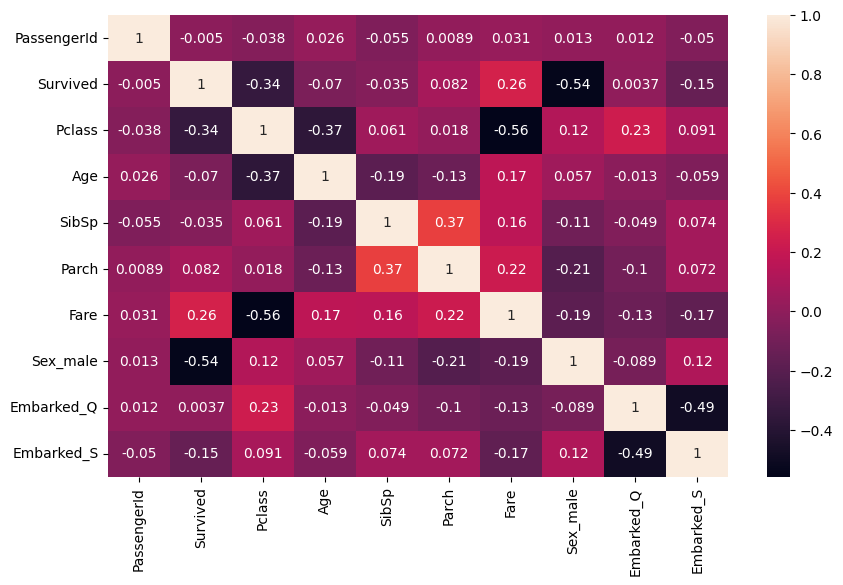

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

<Axes: >

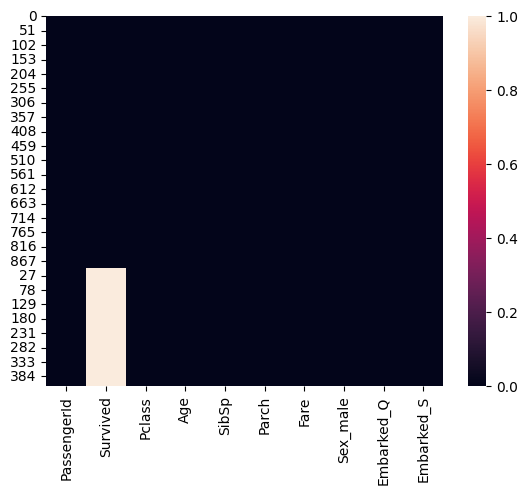

In [14]:
sns.heatmap(df.isnull())

In [15]:
df['Survived'].fillna(df['Survived'].mean(), inplace=True)

<ipython-input-15-8c084874758e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Survived'].fillna(df['Survived'].mean(), inplace=True)


<Axes: >

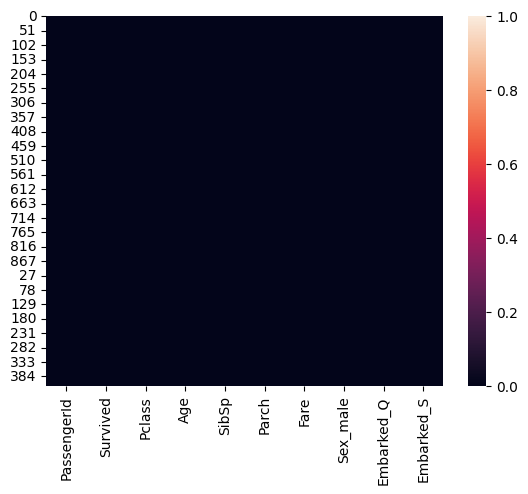

In [16]:
sns.heatmap(df.isnull())

# Scale Dataset

In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [18]:
train_len = train.shape[0]
X_train = df[:train_len]
X_test = df[train_len:]
y_train = train['Survived']

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(891, 10)
(418, 10)
(891,)


# Cross Validation

In [20]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score



In [21]:
def test_model(model, X_train, y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [22]:
!pip install matplotlib-venn

In [23]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [24]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126213 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=34caaf14a5044599a817ef582e040a2fb348bad35614620d91bdddb4286afc86
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [25]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 86.1 MB/s eta 0:00:00


In [26]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Linear Regration

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
test_model(lr, X_train, y_train)


[np.float64(1.0)]

In [28]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=0.1)
test_model(ridge, X_train, y_train)

[np.float64(0.999999394906329)]

In [29]:
lasso = Lasso(alpha=0.1)
test_model(lasso, X_train, y_train)

[np.float64(0.8205001683303047)]

# Support Vector Machine Regration

In [30]:
from sklearn.svm import SVR
svr = SVR()
test_model(svr, X_train, y_train)

[np.float64(0.9582891030984152)]

# Dissition Tree Regration

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
test_model(dt, X_train, y_train)

[np.float64(1.0)]

# Random Forest Regration

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=1000)
test_model(rf, X_train, y_train)

[np.float64(1.0)]

# Baggin and Busting

In [33]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br = BaggingRegressor(random_state=42, n_estimators=1000)
gb = GradientBoostingRegressor(random_state=42, n_estimators=1000)


In [34]:
test_model(br, X_train, y_train)

[np.float64(1.0)]

In [35]:
test_model(gb, X_train, y_train)

[np.float64(0.9999999999999993)]

# Xtream Boosting Regration

In [36]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42, bbooster='gbtree')
test_model(xgb_model, X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg

[np.float64(1.0)]

# SVM Model Build

In [39]:
y_pred = np.exp(rf.predict(X_test))


In [40]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [41]:
submit_test = pd.concat([test['PassengerId'], pd.DataFrame(y_pred, columns=['Survived'])], axis=1)
submit_test.head()

,PassengerId,Survived
0,892,1.0
1,893,1.0
2,894,1.0
3,895,1.0
4,896,1.0


In [42]:
submit_test.to_csv('titanic_submission.csv', index=False)